In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
from mpl_toolkits import mplot3d

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#df = pd.read_csv("../DataFiles/housing.data",delim_whitespace=True, header=None, names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
USAhousing = pd.read_csv("../DataFiles/USA_Housing.csv")
samples, columns = USAhousing.shape
features = columns -1
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']
print("Samples: ",samples, "   Features + y: ",columns)
USAhousing.head(7)


Samples:  5000    Features + y:  7


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."


In [2]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [3]:
def get_bin(rangex,value):
    for i, pos in enumerate(rangex):
        if int(value) <= int(pos):
            return i
    

In [69]:
def get_y_mean(y, rangey):
    for i in rangey:
       
        if y < i:
            return i

In [94]:
def get_y(array,rangey):
    total = np.sum(array)
    #print("Total ",total)
    prob = np.zeros((len(array)))
    if total != 0:
        prob = (array/total) 
        #print("Array prob", prob)
        prob = prob*rangey
        #print("value *rangey ",value)
    prob = np.sum(prob)
    #print("Prob total: ", prob )
    y_mean = get_y_mean(prob, rangey)
    
    return(y_mean)

In [95]:
array = np.arange(1,6,1)
print("original",array)
rangey = np.arange(0,300,60)
print("rangey ",rangey)
t = array/0.5

c = get_y(array, rangey)



original [1 2 3 4 5]
rangey  [  0  60 120 180 240]


In [96]:
x = t*rangey

sumx = np.sum(x)
print("divide total",t)
print("result *rangey",x)
print("rangey ",rangey)
print("sumtotal ",sumx)

divide total [ 2.  4.  6.  8. 10.]
result *rangey [   0.  240.  720. 1440. 2400.]
rangey  [  0  60 120 180 240]
sumtotal  4800.0


In [97]:
def create_samples(x,newpoints=1000):
    newx = np.random.uniform(np.min(x),np.max(x),newpoints)
    newx = np.concatenate((x,newx))
    return newx

In [98]:
def create_model_hist(x1,x2, y,bins = 10):
    minx1,max1 = np.min(x1), np.max(x1)
    minx2,max2 = np.min(x2), np.max(x2)
    miny,maxy = np.min(y), np.max(y)
    stepx1, stepx2, stepy = np.ptp(x1)/bins, np.ptp(x2)/bins, np.ptp(y)/bins
    
    rangex1, rangex2, rangey = np.arange(minx1+stepx1, max1+stepx1, stepx1), np.arange(minx2+stepx2, max2+stepx2, stepx2), np.arange(miny+stepy,maxy+stepx2,stepy)
    #print ("rango y",rangey)
    #print ("rango x2",rangex2)
    out = np.zeros((bins,bins,bins))
      
    for i,value in enumerate(zip(x1,x2)):
        
        binx = get_bin(rangex1,value[0])
        
        binx2 = get_bin(rangex2,value[1])
        outy = y[i]
        biny = get_bin(rangey,outy)
        
        out[binx,binx2,biny]+=1
        
    rangey = np.arange((miny+stepy+miny)/2,(maxy),stepy)
    print("Range y: ",rangey.shape)
    model = np.zeros((bins,bins))
    
    for i in range(0,bins):
        for j in range(0,bins):
            col = out[i,j:,] 
            #print("col ",col)
           
            y_mean = get_y(col,rangey)
            
            model[i][j] = y_mean
            
   
    print("unique model: ", np.unique(model).shape)
    
    return list((model, rangex1,rangex2,rangey))

In [100]:
x1 = X['Avg. Area Number of Rooms']
x1 = np.array(x1)

x2 = X['Avg. Area Income']
ycopy = y.copy()

model = create_model_hist(x1,x2,ycopy)


Range y:  (10,)
unique model:  (9,)


In [24]:
def build_model(model, x1,x2):    
    newy = np.zeros(x1.shape[0])
    y = model[0]
    
    rangex1 = model[1]
    rangex2 = model[2]
    for i,value in enumerate(zip(x1,x2)):      
        binx = get_bin(rangex1,value[0])     
        binx2 = get_bin(rangex2, value[1])     
        newout = y[binx][binx2]     
        newy[i] = newout
        
    return newy


In [25]:
def plot_hpi(x="Avg. Area House Age", x2="Area Population", num_points = 100):
    zdata = y[0:num_points]
    xdata = X[x].iloc[0:num_points,]
    ydata = X[x2].iloc[0:num_points,]
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    ax.scatter3D(xdata, ydata, zdata, cmap='Greens');
    ax.set_xlabel(x)
    ax.set_ylabel(x2,labelpad=0.9)
    ax.set_zlabel("HPI")
    return ax


In [26]:

def plot_hpi_regression(X,Y,Z):
    num_points = 10
    zdata = y[0:num_points]
    xdata = X[0:num_points,]
    ydata = Y[0:num_points,]

    

    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    
    # Plot the surface.
    surf = ax.plot_trisurf(X, Y, Z, cmap=cm.jet,
                               linewidth=0.2, antialiased=False)
    
    ax.scatter3D(xdata, ydata, zdata, cmap='Greens');
   
    plt.show()


In [27]:
def plot_hpi_regression2(X,Y,Z):
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    
    
    X, Y = np.meshgrid(X, Y)
    
    # Plot the surface.
    # surf = ax.plot_surface(X, Y, Z,
    #                            linewidth=0.2, antialiased=True)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                               linewidth=0.3, antialiased=False)
    
   
    plt.show()


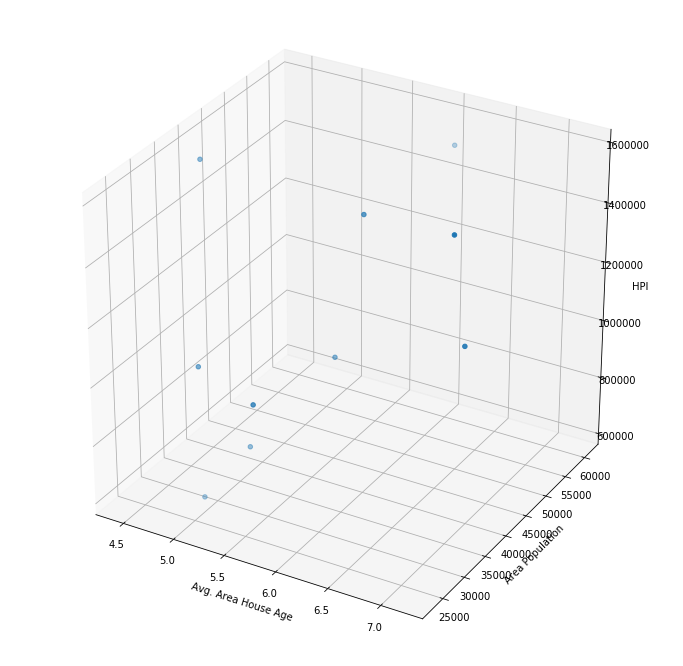

In [28]:
plot_h = plot_hpi(num_points=10)

In [101]:
newx1 = create_samples(x1,newpoints=40000)
newx2 = create_samples(x2,newpoints=40000)
print(newx1.shape,newx1.shape)

(45000,) (45000,)


In [105]:
newy = build_model(model,newx1,newx1)
print("shape newy", newy.shape, np.unique(newy).shape)

shape newy (45000,) (5,)


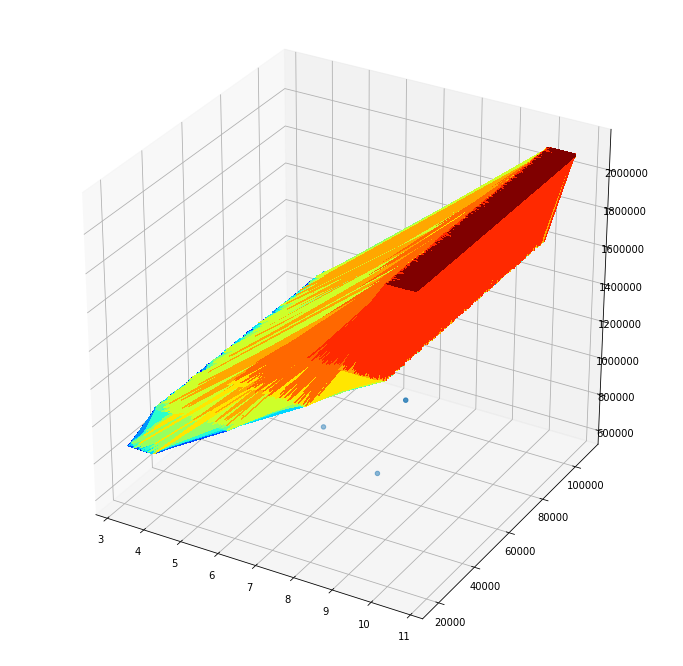

In [103]:
point = 45000
plot_hpi_regression(newx1[0:point],newx2[0:point],newy[0:point])

In [64]:
xx = np.meshgrid(x1[0:10],x2[0:10])
print("x1: ",x1[0:10])
print("x2: ",x2[0:10])
print("xx: ",xx[0:10])


x1:  [5.68286132 6.00289981 5.86588984 7.18823609 5.04055452 4.98840776
 6.02533591 6.98977975 5.36212557 4.42367179]
x2:  [23086.80050269 40173.07217364 36882.1593997  34310.24283091
 26354.1094721  26748.42842469 60828.24908541 36516.35897249
 29387.39600282 40149.96574921]
xx:  [array([[5.68286132, 6.00289981, 5.86588984, 7.18823609, 5.04055452,
        4.98840776, 6.02533591, 6.98977975, 5.36212557, 4.42367179],
       [5.68286132, 6.00289981, 5.86588984, 7.18823609, 5.04055452,
        4.98840776, 6.02533591, 6.98977975, 5.36212557, 4.42367179],
       [5.68286132, 6.00289981, 5.86588984, 7.18823609, 5.04055452,
        4.98840776, 6.02533591, 6.98977975, 5.36212557, 4.42367179],
       [5.68286132, 6.00289981, 5.86588984, 7.18823609, 5.04055452,
        4.98840776, 6.02533591, 6.98977975, 5.36212557, 4.42367179],
       [5.68286132, 6.00289981, 5.86588984, 7.18823609, 5.04055452,
        4.98840776, 6.02533591, 6.98977975, 5.36212557, 4.42367179],
       [5.68286132, 6.00289981, 

<class 'numpy.ndarray'>
2


ValueError: shape mismatch: objects cannot be broadcast to a single shape

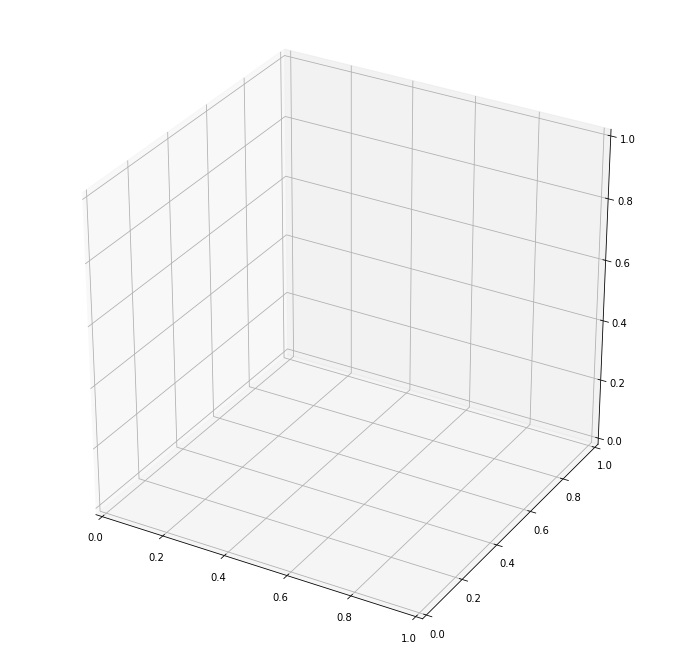

In [71]:
print(type(model[0]))
print(model[0].ndim)
plot_hpi_regression2(newx1[0:point],newx2[0:point],model[0][0:point,:])